In [2]:
#importing important libraries:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

The data is split into train and test. The input data (train_images.csv and test_images.csv) consist on Images of one chanel 110x110, pixels from 0 to 255, where every image is one row of 12100 columns (all the 110 rows of 110 columns), this images can contain more then one volcano or maybe none.

The label data (train_labels.csv and test_labels.csv), contains four columns:

Volcano?: if in the image there are volcanoes (Main target), 1 or 0.
for Volcano?=0 this three next features are NaN
Type: 1= definitely a volcano,2 =probably, 3= possibly, 4= only a pit is visible
Radius: is the radius of the volcan in the center of the image, in pixels
Number Volcanoes: The number of volcanoes in the image

In [3]:
#load the data:

test_images = pd.read_csv("test_images.csv")
test_labels = pd.read_csv("test_labels.csv")
train_images = pd.read_csv("train_images.csv")
train_labels = pd.read_csv("train_labels.csv")


In [4]:
print("train_images:", train_images.shape)
print("train_labels:", train_labels.shape)
print("test_images:", test_images.shape)
print("test_labels:", test_labels.shape)

train_images: (6999, 12100)
train_labels: (7000, 4)
test_images: (2733, 12100)
test_labels: (2734, 4)


In [5]:
train_images.head()

,95,101,99,103,95.1,86,96,89,70,104,...,111.214,107.329,92.354,89.258,103.379,99.414,117.112,116.103,118.82,96.423
0,91,92,91,89,92,93,96,101,107,104,...,103,92,93,95,98,105,104,100,90,81
1,87,70,72,74,84,78,93,104,106,106,...,84,71,95,102,94,80,91,80,84,90
2,0,0,0,0,0,0,0,0,0,0,...,94,81,89,84,80,90,92,80,88,96
3,114,118,124,119,95,118,105,116,123,112,...,116,113,102,93,109,104,106,117,111,115
4,79,95,90,82,73,74,77,75,82,87,...,90,80,79,78,65,71,62,97,89,73


The name of the columns are actually the values of the images, we need to convert them into the first row.

In [6]:
train_images.loc[-1]= train_images.columns.values.astype(float).astype(int) 
train_images.index = train_images.index + 1 
train_images.sort_index(inplace=True)
train_images.columns = np.arange(len(train_images.columns))

In [7]:
train_images.head()

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,95,101,99,103,95,86,96,89,70,104,...,111,107,92,89,103,99,117,116,118,96
1,91,92,91,89,92,93,96,101,107,104,...,103,92,93,95,98,105,104,100,90,81
2,87,70,72,74,84,78,93,104,106,106,...,84,71,95,102,94,80,91,80,84,90
3,0,0,0,0,0,0,0,0,0,0,...,94,81,89,84,80,90,92,80,88,96
4,114,118,124,119,95,118,105,116,123,112,...,116,113,102,93,109,104,106,117,111,115


In [8]:
test_images.head()

,107,116,108,101,107.1,109,108.1,110,100,109.1,...,111.530,110.531,109.516,109.517,101.440,106.562,106.563,117.283,130.55,134.20
0,93,95,98,100,90,100,108,98,90,103,...,86,93,59,88,89,89,92,99,92,113
1,108,108,92,116,116,140,126,104,112,103,...,118,111,113,107,107,121,141,160,131,138
2,165,164,156,159,151,120,103,114,114,116,...,69,96,109,91,94,83,48,69,86,75
3,105,106,84,115,121,103,94,108,103,91,...,92,89,96,89,91,102,99,90,90,73
4,127,135,128,125,124,136,128,136,146,136,...,105,114,117,125,104,115,117,122,117,117


In [9]:
#same is done for the test data

test_images.loc[-1] = test_images.columns.values.astype(float).astype(int)
test_images.index = test_images.index+1
test_images.sort_index(inplace=True)
test_images.columns = np.arange(len(test_images.columns))

In [10]:
test_images.head()

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,107,116,108,101,107,109,108,110,100,109,...,111,110,109,109,101,106,106,117,130,134
1,93,95,98,100,90,100,108,98,90,103,...,86,93,59,88,89,89,92,99,92,113
2,108,108,92,116,116,140,126,104,112,103,...,118,111,113,107,107,121,141,160,131,138
3,165,164,156,159,151,120,103,114,114,116,...,69,96,109,91,94,83,48,69,86,75
4,105,106,84,115,121,103,94,108,103,91,...,92,89,96,89,91,102,99,90,90,73


In [11]:
print("train_images:", train_images.shape)
print("test_images:", test_images.shape)

train_images: (7000, 12100)
test_images: (2734, 12100)


In [12]:
train_labels.head()

,Volcano?,Type,Radius,Number Volcanoes
0,1,3.0,17.46,1.0
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN


In [13]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Volcano?          7000 non-null   int64  
 1   Type              1000 non-null   float64
 2   Radius            1000 non-null   float64
 3   Number Volcanoes  1000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 218.9 KB


For this classification project, i will be focusing on the 'Volcano?' as the target variable.

In [14]:
# Combining the train and test data together:


x_train = train_images
y_train = train_labels['Volcano?']
training_data = pd.concat([x_train,y_train], axis=1)

x_test = test_images
y_test = test_labels['Volcano?']
test_data = pd.concat([x_test, y_test], axis=1)

data = pd.concat([training_data, test_data], axis=0)



In [15]:
data.shape

(9734, 12101)

We can see what those pictures look like:

Images containing volcanoes:


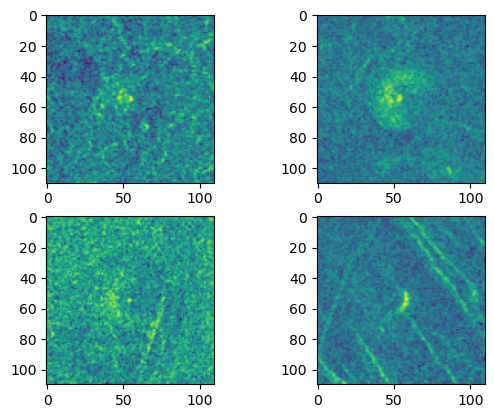

In [16]:
volcano_data = data[(data['Volcano?']==1)]
no_valcano_data = data[(data['Volcano?']==0)]


print("Images containing volcanoes:")
plt.figure()
for x in range(4):
    row = np.array(volcano_data.iloc[x,:-1])
    image = row.reshape(110,110)
    plt.subplot(2,2,x+1)
    plt.imshow(image)
plt.show()

Images with no volcanoes:


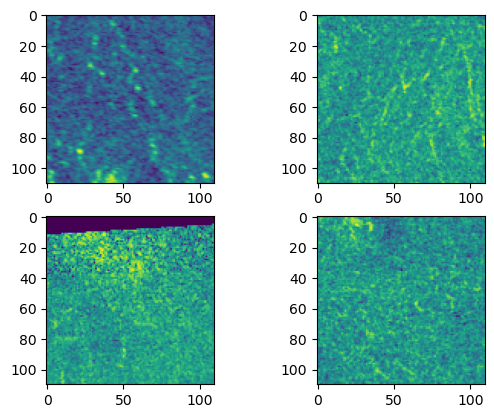

In [17]:
print("Images with no volcanoes:")
plt.figure()
for x in range(4):
    row = np.array(no_valcano_data.iloc[x,:-1])
    image = row.reshape(110,110)
    plt.subplot(2,2,x+1)
    plt.imshow(image)
plt.show()

There is an imbalance between the two classes in the data, let's visualise that:

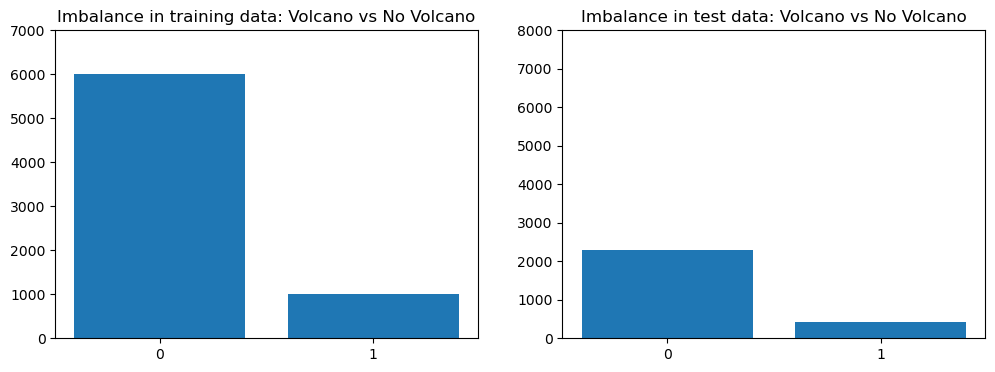

In [18]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.bar(training_data.groupby('Volcano?')['Volcano?'].count().index.astype(str),
         training_data.groupby('Volcano?')['Volcano?'].count())
plt.ylim(0,7000)
plt.title("Imbalance in training data: Volcano vs No Volcano")

plt.subplot(1,2,2)
plt.bar(test_data.groupby('Volcano?')['Volcano?'].count().index.astype(str),
         test_data.groupby('Volcano?')['Volcano?'].count())
plt.ylim(0,8000)
plt.title("Imbalance in test data: Volcano vs No Volcano")

plt.show()


The bar graph shows that there are way more 'no volcano' images than 'contains volcano'. We need to address this problem.
I will split my data test into training and test, and i will use 'stratify' and 'shuffle' so that there will be the same proportion 'volcano' and 'no volcano' in training and test data:

In [19]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, stratify=y, shuffle=True)

In [20]:
print("x train:", x_train.shape)
print("y train:", y_train.shape)
print("x test:", x_test.shape)
print("y test:", y_test.shape)

x train: (7787, 12100)
y train: (7787,)
x test: (1947, 12100)
y test: (1947,)


To solve the imbalance between classes, I will use an oversampling technique, SMOTE, and will apply that to my training data:

In [21]:
train_stratify = pd.concat([x_train,y_train], axis=0)
test_stratify = pd.concat([x_test, y_test], axis=0)

x_train_smote, y_train_smote = SMOTE().fit_resample(x_train, y_train)

In [22]:
print(x_train_smote.shape)
print(y_train_smote.shape)

(13280, 12100)
(13280,)


In [23]:
y_train_smote.head()

0    0
1    0
2    0
3    0
4    1
Name: Volcano?, dtype: int64

In [24]:
# converting it into a data frame:

y_train_smote = pd.DataFrame(y_train_smote)

In [25]:
smote_data = pd.concat([x_train_smote, y_train_smote], axis=1)

Text(0.5, 1.0, 'Volcano vs. No Volcano after SMOTE')

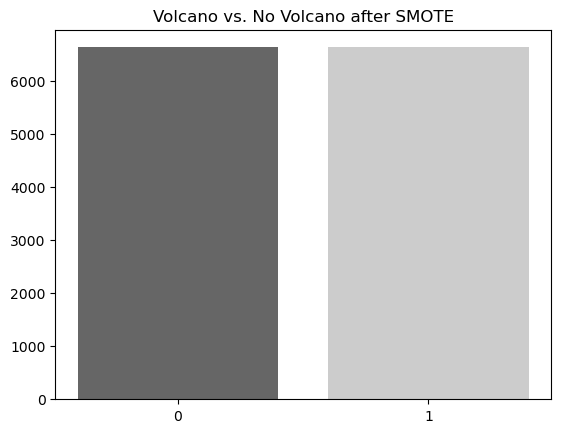

In [26]:
# visualising the results of the SMOTE process:

plt.bar(smote_data.groupby('Volcano?')['Volcano?'].count().index.astype(str),
         smote_data.groupby('Volcano?')['Volcano?'].count(),
         color=['.4','.8'])
plt.title('Volcano vs. No Volcano after SMOTE')

From the above graph, we can see that the imbalance between the classes has been treated.

Now, let's strat building the model.
Before that, we need to preprocess the images data by scaling them.
Since all of the data are images with pixels values 0 to 255, we can just divide all of the cells by 255 to get the values between 0 and 1.

In [27]:
x_train_smote_scale = x_train_smote.iloc[:,:]/255
x_train_smote_scale.head()

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,0.282353,0.180392,0.282353,0.262745,0.301961,0.341176,0.313725,0.411765,0.352941,0.298039,...,0.250980,0.317647,0.341176,0.364706,0.341176,0.243137,0.286275,0.286275,0.352941,0.286275
1,0.368627,0.325490,0.188235,0.274510,0.321569,0.309804,0.341176,0.392157,0.372549,0.368627,...,0.321569,0.341176,0.356863,0.380392,0.345098,0.298039,0.270588,0.329412,0.325490,0.325490
2,0.345098,0.380392,0.301961,0.294118,0.258824,0.321569,0.349020,0.309804,0.341176,0.349020,...,0.317647,0.274510,0.309804,0.270588,0.262745,0.364706,0.380392,0.321569,0.305882,0.309804
3,0.274510,0.309804,0.396078,0.443137,0.454902,0.478431,0.435294,0.392157,0.388235,0.309804,...,0.411765,0.400000,0.349020,0.309804,0.298039,0.427451,0.474510,0.407843,0.305882,0.305882
4,0.400000,0.376471,0.349020,0.313725,0.349020,0.349020,0.325490,0.368627,0.325490,0.341176,...,0.470588,0.458824,0.407843,0.380392,0.337255,0.403922,0.411765,0.392157,0.372549,0.321569


Also, we can see that there are 12100 features due to which the model will take a long time to run, 
I will be using dimension reduction, PCA, on the scaled SMOTE data so that the model performs best.

In [28]:
pca = PCA(n_components=100)
x_train_pca = pca.fit_transform(x_train_smote_scale)

Now, we can train the models. I will be training two models: Logistic and Random Forest, also using cross validation technique:

In [29]:
scoring = ["accuracy","precision","recall"]

In [30]:
logistic_regression_model = LogisticRegression(max_iter=1000)
random_forest_classification = RandomForestClassifier()

In [31]:
cross_validate(logistic_regression_model, x_train_pca, y_train_smote, scoring=scoring, cv=3)

{'fit_time': array([2.18842888, 0.23592329, 0.26409435]),
 'score_time': array([0.37145805, 0.03230906, 0.02610993]),
 'test_accuracy': array([0.89948046, 0.93178225, 0.9249887 ]),
 'test_precision': array([0.93079922, 0.926405  , 0.91016136]),
 'test_recall': array([0.86308179, 0.93812105, 0.94306371])}

In [32]:
cross_validate(random_forest_classification, x_train_pca, y_train_smote, scoring=scoring, cv=3)

{'fit_time': array([12.62884259, 10.65688467, 10.09668803]),
 'score_time': array([0.11053014, 0.07811213, 0.07810903]),
 'test_accuracy': array([0.94849785, 0.97628191, 0.97514686]),
 'test_precision': array([0.98485589, 0.972658  , 0.9738621 ]),
 'test_recall': array([0.91098057, 0.98012647, 0.97650249])}